In [11]:
import os
# import argparse
from matplotlib import pyplot as plt
from glob import glob
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument('--model', default='GC_VIT', help='load best model: 1 or 0')
# ap.add_argument('--resume', default=True, action='store_true', help='load best model: 1 or 0')
# ap.add_argument('--batchsize', default=1, type=int, help='batch size')
# ap.add_argument('--use_gpus', default='all', type=str, help='all or by id: 0,1,2 or 0 or 1 or 0,1,2,3,4,5,6,7')
# ap.add_argument('--epochs', default=100, type=int, help='number of epochs')
# ap.add_argument('--lr', default=1e-3, type=float, help='learning rate')
# ap.add_argument('--normalize_head', default='none', type=str, help='normalize head: none, mean_std, mean_std_min_max or min_max')
# ap.add_argument('--normalize_tail', default='none', type=str, help='normalize tail: none, mean_std, mean_std_min_max or min_max')
# args = vars(ap.parse_args())


args = {}

args['model'] = 'GC_VIT_XXTINY'
args['resume'] = True
args['batchsize'] = 1
args['use_gpus'] = 'all'
args['path_model'] = 'GC_VIT_XXTINY-v=02-epoch=143-val_loss=2.34.ckpt'
args['epochs'] = 100
args['lr'] = 1e-3
args['normalize_head'] = 'none'
args['normalize_tail'] = 'none'
 


if args['use_gpus'] != 'all':
  if args['use_gpus'][-1] == ',':
    args['use_gpus'] = args['use_gpus'][:-1]
  if args['use_gpus'][0] == ',':
    args['use_gpus'] = args['use_gpus'][1:]
  os.environ['CUDA_VISIBLE_DEVICES'] = args['use_gpus']
else:
  import torch
  args['use_gpus'] = ','.join(str(v) for v in range(torch.cuda.device_count()))
  os.environ['CUDA_VISIBLE_DEVICES'] = args['use_gpus']

from pytorch_lightning import Trainer
from pyramidal.v1.models.pt_wfnet import WFNet
from pyramidal.v1.generators.generator_pt import Generator, data_loader
# from pyramidal.v1.models.pt_gc_vit import GC_VIT_Lightning, GC_VIT_Lightning_xxtiny
# from pyramidal.models.pt_gc_vit_3d import GC_VIT_3D_Lightning
# from pytorch_lightning.callbacks import ModelCheckpoint
# from pytorch_lightning.callbacks.progress import TQDMProgressBar

# num_gpus = len(args['use_gpus'].split(','))
# version_num = 0
# if len(glob('lightning_logs/version_*')) > 0:
#   version_num = int(sorted(glob('lightning_logs/version_*'))[-1].split('_')[-1]) + 1

# if args['model'] == 'WFNet':
#   model_to_use = WFNet
#   is_gcvit = False
#   name_model = 'WFNet'
# elif args['model'] == 'GC_VIT' != -1:
#   model_to_use = GC_VIT_Lightning
#   is_gcvit = True
#   name_model = 'GC_VIT'
# elif args['model'] == 'GC_VIT_XXTINY':
#   model_to_use = GC_VIT_Lightning_xxtiny
#   is_gcvit = True
#   name_model = 'GC_VIT_XXTINY'



# trainer = Trainer(accelerator='gpu', devices=1)

__file__ = '/home/mvaldi-pucv-low/Documentos/optolab/pyramidal/pyramidal/plot.ipynb'

# if args['path_model']:
#   path_weights = f'{os.path.dirname(__file__)}/saved_models/{args["path_model"]}'
#   print(f'Loading model from {path_weights}')
#   model = model_to_use.load_from_checkpoint(path_weights)
# else:
#   model = model_to_use()

# model.eval()
# model.cuda()

train = Generator('train', batchsize=1,
                  normalize_head=args['normalize_head'],
                  normalize_tail=args['normalize_tail'],
                  is_gcvit=False,
                  )

values_normalize_head = train.values_normalize_head
values_normalize_tail = train.values_normalize_tail

val   = Generator('val',   batchsize=1,
                  normalize_head=args['normalize_head'],
                  values_normalize_head=values_normalize_head,
                  normalize_tail=args['normalize_tail'],
                  values_normalize_tail=values_normalize_tail,
                  is_gcvit=False,
                  )

test   = Generator('test',   batchsize=1,
                  normalize_head=args['normalize_head'],
                  values_normalize_head=values_normalize_head,
                  normalize_tail=args['normalize_tail'],
                  values_normalize_tail=values_normalize_tail,
                  is_gcvit=False,
                  )




train_data_loader = data_loader(train, batchsize=args['batchsize'], shuffle=True,
                                num_workers=len(os.sched_getaffinity(0)))
val_data_loader   = data_loader(val,   batchsize=args['batchsize'], shuffle=False,
                                num_workers=len(os.sched_getaffinity(0)))
test_data_loader  = data_loader(test,   batchsize=args['batchsize'], shuffle=False,
                                num_workers=len(os.sched_getaffinity(0)))


# if not is_gcvit:
#   x = next(iter(train_data_loader))[0]
#   # create a random batch of input data
#   # x = torch.rand(1, 1, 224, 224)
#   model.train()
#   model.forward(x)


# a = trainer.test(model, test_data_loader)

In [12]:
x_train, y_train = next(iter(train_data_loader))
x_test, y_test = next(iter(test_data_loader))

# x_train = x_train.cuda()
# x_test  = x_test.cuda()

# predict_train = model.predict(x_train)
# predict_test = model.predict(x_test)
# x_train = x_train.cpu().detach().numpy()
# x_test  = x_test.cpu().detach().numpy()
# y_train = y_train.cpu().detach().numpy()
# y_test  = y_test.cpu().detach().numpy()
# predict_train = predict_train.cpu().detach().numpy()
# predict_test  = predict_test.cpu().detach().numpy()

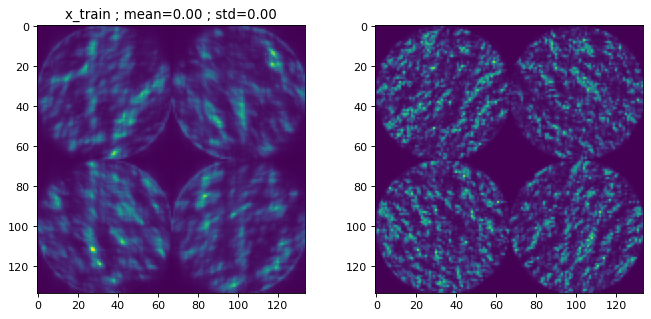

In [13]:
plt.figure(figsize=(10, 20), dpi=80)
# plot x_train, x_test images and their predictions 

plt.subplot(4, 2, 1)
plt.imshow(x_train[0, 0, :, :])
plt.title(f'x_train ; mean={x_train[0, 0, :, :].mean():.2f} ; std={x_train[0, 0, :, :].std():.2f}')
plt.subplot(4, 2, 2)
plt.imshow(x_test[0, 0, :, :])
# plt.title(f'x_test ; mean={x_test[0, 0, :, :].mean():.2f} ; std={x_test[0, 0, :, :].std():.2f}')
# plt.subplot(4, 2, 3)
# plt.plot(predict_train[0])
# plt.grid()
# plt.title(f'predict_train ; mse = {((predict_train[0] - y_train[0])**2).mean():.2f} ; rmse = {((predict_train[0] - y_train[0])**2).mean()**0.5:.2f}')
# plt.subplot(4, 2, 4)
# plt.plot(predict_test[0])
# plt.grid()
# plt.title(f'predict_test ; mse = {((predict_test[0] - y_test[0])**2).mean():.2f} ; rmse = {((predict_test[0] - y_test[0])**2).mean()**0.5:.2f}')
# plt.subplot(4, 2, 5)
# plt.plot(y_train[0])
# plt.grid()
# plt.title('y_train')
# plt.subplot(4, 2, 6)
# plt.plot(y_test[0])
# plt.grid()
# plt.title('y_test')
# # add difference between predict and y
# plt.subplot(4, 2, 7)
# plt.plot(predict_train[0] - y_train[0])
# plt.grid()
# plt.title('predict_train - y_train')
# plt.subplot(4, 2, 8)
# plt.plot(predict_test[0] - y_test[0])
# plt.grid()
# plt.title('predict_test - y_test')
plt.show()


In [6]:
x_train.shape

torch.Size([1, 1, 224, 224])

In [6]:
import numpy as np
np.mean(abs(y.detach().numpy()[-1] - predict.detach().numpy()[-1]))

0.07031765